In [1]:
import numpy as np
import pandas as pd

import ipywidgets as widgets
from IPython.display import display, Math, Markdown

import dtmc
import mcviz

Loading BokehJS ...

# DTMC: Section 5 - Markov Chain Structure

In this section, we will introduce some notation and terminology to describe the **structure** of a Markov chain.  In Section 3, we saw that dynamics of a discrete-time Markov chain can be deduced entirely from the one-step transition probability matrix $\mathbf{P}$ (via the Chapman-Kolmogorov equations) and in Section 4, we made these calculations for a specific numerical example (modeling a ride-share driver's path through the Miami area).

The content of this section will help us understand the dynamics of a Markov chain more analytically -- just by examining $\mathbf{P}$ and without having to do any calculations.  Obviously, this leaves out some details of the dynamics, but it is useful as a high-level description.

First, we will examine the relationship between states in the state space and describe a useful way of grouping states.  Then, we will characterize each individual state -- in particular whether the Markov chain will visit a state a finite number of times or infinitely often.

While we are mathematically defining the concepts below, it is extremely important that you develop an intuitive sense of each concept.  We define these concepts because they are useful

## Accessibility and Communication

**Definition:** State $j$ is **accessible from** state $i$ if $p^{(m)}_{ij} > 0$ for some $m \geq 0$.

**Notation:** $i \rightarrow j$

(*Intuition:* It is possible for the Markov chain to reach $j$ starting from $i$.  Not necessarily in one step.)

**Definition:** State $i$ and state $j$ **communicate** if $i \rightarrow j$ and $j \rightarrow i$ (each is accessible from the other).

**Notation:** $i \leftrightarrow j$

(*Intuition:* It is possible for the Markov chain to go back and forth between $i$ and $j$.  Not necessarily in one step.)

**Definition:** the set of all states that communicate with each other make up a **communication class** (which is a subset of the state space $\mathcal{S}$)

**Definition:** If all the states of a Markov chain belong to a single communication class, then the Markov chain is **irreducible**.

### Remarks

Note that the definition of accessibility looks at $m$-step transition probabilities for any $m \geq 0$:
* It may be that $i \to j$ even if the one-step transition probability $p_{ij} = 0$.  
    In other words, multi-step transitions are fine for satisfying accessibility.    
* Since we define $\mathbf{P}^{(0)} = \mathbf{1}$ (the identity matrix), every state is accessible from itself.
* For a finite state-space Markov chain, if state $j$ is accessible from state $i$ then it must be accessible in $|\mathcal{S}|$ or fewer steps: $p_{ij}^{(m)} > 0$ for some $m \leq |\mathcal{S}|$.  
    ($|\mathcal{S}|$ is [cardinality](https://en.wikipedia.org/wiki/Cardinality) of $\mathcal{S}$: the number of states in the state-space).  

    (This last statement is not obvious.  Why is it true?)
    
Communication is a *transitive* property: if $i \leftrightarrow j$ and $j \leftrightarrow k$ then $i \leftrightarrow k$.  You can prove this easily with the Chapman-Kolmogorov Equations.

Regarding communication classes:
* Every state belongs to one and only one communication class.
* A Markov chain may have one or more communication classes, but no more than $|\mathcal{S}|$.
* The state space $\mathcal{S}$ can be [partitioned](https://en.wikipedia.org/wiki/Partition_of_a_set) into communication classes.
* A communication class contains *all* the states that communicate with each other (not only some).  (A proper subset of a communication class is not a communication class.)
* Once the Markov chain leaves a communication class, it can never return.  (Why?)


### Exercise 5.1

For each of the following DTMCs, identify whether $i \rightarrow j$ for every pair of states $i, j \in \mathcal{S}$.

(There are $|\mathcal{S}|^2$ pairs although $|\mathcal{S}|$ are trivial since every state is accessible from itself.)

In [2]:
S = [1,2,3]
P = np.array([[0, 1, 0],
              [0, 0, 1],
              [1, 0, 0]
             ])
display(Math(r'\mathcal{S} = \{' + ','.join(map(str,S)) + '\}'))
display(Math(r'\mathbf{P} = ' + dtmc.pmatrix(P, frac=True)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
S = [1,2,3]
P = np.array([[0, 0.5, 0.5],
              [0.25, 0.5, 0.25],
              [0, 0, 1]
             ])
display(Math(r'\mathcal{S} = \{' + ','.join(map(str,S)) + '\}'))
display(Math(r'\mathbf{P} = ' + dtmc.pmatrix(P, frac=True)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(The DTMC below is randomly generated. Re-run the codeblock to get a new example.)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

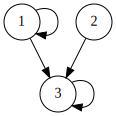

In [4]:
S = [1,2,3]
P = dtmc.rand_P(len(S), p=.4)
display(Math(r'\mathcal{S} = \{' + ','.join(map(str,S)) + '\}'))
display(Math(r'\mathbf{P} = ' + dtmc.pmatrix(P, frac=True)))
display(mcviz.dot_mc(P, S, engine='dot', bidir=True, self_edge=True))

### Exercise 5.2

Show that communication is a transitive property: if $i \leftrightarrow j$ and $j \leftrightarrow k$ then $i \leftrightarrow k$.

*Hint:* Pick one direction, say $i \rightarrow j$ and $j \rightarrow k$.  This means $p_{ij}^{(n)} > 0$ and $p_{jk}^{(m)} > 0$ for some $n, m \geq 0$.  Use the Chapman-Kolmogorov equations to show that $i \rightarrow k$.  The reverse direction is essentially the same argument.

## Transience and Recurrence

Define the return probability for state $i$, denoted $f_i$, to be the probability that the Markov chain, given that it starts in $i$, *ever* returns to state $i$ at some point in the future.

$$ f_i = \mathsf{P}\left(\left.\bigcup_{m=1}^\infty \{X_n = i\} \,\right|\, X_0=i\right) = \mathsf{P}(\text{ever returns to $i$}\,|\,\text{starts in $i$}) $$

**Definition:** State $i$ is **transient** if $f_i < 1$: the return probability is strictly less than 1.  Then the Markov chain will visit this state only a finite number of times (and eventually the Markov chain will leave this state and never return).

**Definition:** State $i$ is **recurrent** if $f_i = 1$: the return probability is equal to 1.  Then the Markov chain will visit this state an infinite number of times.

Transience and recurrence are **class properties**: all states in a communication class share the same property.  So if one state in a communication class is transient, then all states in that communication class are transient.  Or if one state in a communication class is recurrent, then all states in that communication class are recurrent.  Note that recurrence is defined for a state, but we may sometimes describe a communication class as transient (or recurrent), by which we mean all states in the communication class are transient (or recurrent).

Recurrent states can be further classified as either **null recurrent** or **positive recurrent** based on the amount of time it takes for the Markov chain to return (since it returns with probability 1).  This is still a class property.  Define the return time (number of steps) to state $i$ as follows
$$\tau_{ii} = \begin{cases}
    \infty &\text{if $X_n \neq i$ for all $n \geq 1$} \\
    \min\{n \geq 1 : X_n = i\,|\, X_0 =i\} & \text{otherwise}.
  \end{cases}$$
Note that $f_i = \mathsf{P}(\tau_{ii} < \infty)$.

**Definition:** State $i$ is **positive recurrent** if $\mathsf{E}[\tau_{ii}] < \infty$.

**Definition:** State $i$ is **null recurrent** if $\mathsf{E}[\tau_{ii}] = \infty$.

**Remark:** For a finite state-space Markov chain ($|\mathcal{S}| < \infty$), any recurrent state is positive recurrent and at least one state will be recurrent.  (It is impossible for a state to be null-recurrent and it is impossible for all states to be transient.)  Note that this is not true if the state space is infinite (which we will see with the random walk.

**Definition:** A **DTMC is positive recurrent** if it is irreducible and all its states are positive recurrent.

This means we are using the term “positive recurrent” in two different ways.  One way applies to an individual state in the DTMC and the other way applies to the entire DTMC.

**Result:** If a DTMC has a finite state space ($|\mathcal{S}| < \infty$) and is irreducible, then it is positive recurrent.  (This follows from the remark above and the fact that positive recurrence is a class property.)

### Exercise 5.3

Suppose the return probability for state $i$ is $f_i < 1$, so state $i$ is transient.  Let $G_i$ be the number of times the Markov chain visits state $i$.  $G_i$ is a random variable -- what is its distribution? (Explain.)

## Absorbing State

**Definition:** A state $i$ is **absorbing** if $p_{ii} = 1$.  That is, if the Markov chain ever reaches this state, it never leaves.

### Exercise 5.4

Argue that if a state $i$ is absorbing then its communication class is $\{i\}$ (contains only itself) and that it is positive recurrent.

## Periodic and Aperiodic

For the original rat-in-the-maze example and the ride-share driver example, what happened with $\mathbf{P}^{(m)}$ for large $m$?

In [5]:
P_rat = np.array([[0, 0.5, 0, 0.5],
                  [0.5, 0, 0.5, 0],
                  [0, 0.5, 0, 0.5],
                  [0.5, 0, 0.5, 0]])

P_driver = np.array([[0.3, 0.2, 0.4, 0.1],
                     [0.4, 0.1, 0.4, 0.1],
                     [0.7, 0.2, 0, 0.1],
                     [0.5, 0.3, 0.1, 0.1]
                    ])

m_slider = widgets.IntSlider(value=1, min=1, max=50, description='m')

def wrapper(m):
    print('Rat in a Maze')
    display(np.linalg.matrix_power(P_rat, m))
    print('Ride-Share Driver')
    display(np.linalg.matrix_power(P_driver, m))

widgets.interact(wrapper, m=m_slider);

interactive(children=(IntSlider(value=1, description='m', max=50, min=1), Output()), _dom_classes=('widget-int…

**Definition:** A state $j$ has period $d \geq 2$ if $p_{jj}^{(m)} > 0$ for any $m$ that is an integer multiple of $d$ and $p_{jj}^{(m)} = 0$ otherwise.  That is, it is only possible for the Markov chain to return to state $j$ in a multiple of $d$ steps.  

In the case of the rat in the maze, it was only possible to return to a room in an even number of steps, hence every state has a period of $d = 2$.

Periodicity (and the period itself) is a class property, so we will say that an irreducible Markov chain is **periodic** if it has some period $d \geq 2$ and otherwise is it is **aperiodic**.  (For a finite state space periodic Markov chain, $d \leq |\mathcal{S}|$.)

If we look at $\mathbf{P}^{(m)}$ for the rat in the maze (which is **periodic** with a period of $2$), the $m$-step transition probability matrix just switches back and forth between two forms:

$$\text{for odd $m$:}\quad \mathbf{P}^{(m)} = \mathbf{P}^{(1)} =
  \begin{pmatrix}
    0 & 1/2 & 0 & 1/2 \\
    1/2 & 0 & 1/2 & 0 \\
    0 & 1/2 & 0 & 1/2 \\
    1/2 & 0 & 1/2 & 0
  \end{pmatrix}$$
  
  
$$\text{for even $m$:}\quad \mathbf{P}^{(m)} = \mathbf{P}^{(2)} =
  \begin{pmatrix}
    1/2 & 0 & 1/2 & 0 \\
    0 & 1/2 & 0 & 1/2 \\
    1/2 & 0 & 1/2 & 0 \\
    0 & 1/2 & 0 & 1/2
  \end{pmatrix}$$

By contrast, the DTMC representing the ride-share driver is **aperiodic** - there is no such switching behavior.  In fact, each transition probability *converges* to a limit:

$$\lim_{m \to \infty} \mathbf{P}^{(m)} =
  \begin{pmatrix}
    0.4448 & 0.1909 & 0.2643 & 0.1 \\
    0.4448 & 0.1909 & 0.2643 & 0.1 \\
    0.4448 & 0.1909 & 0.2643 & 0.1 \\
    0.4448 & 0.1909 & 0.2643 & 0.1
  \end{pmatrix}$$
  
**This convergence only happens if the DTMC is aperiodic.**

### Exercise 5.5

For each of the following (rat-in-a-maze examples), determine whether the DTMC below is periodic or aperiodic.  If it is periodic, specify its period.

(**Note:** The first two are the same mazes as in Exercise 2.2.  You can also use the randomly-generated mazes to practice.)

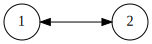

In [6]:
S = [1,2]
P = np.array([[0, 1], [1, 0]])
mcviz.dot_mc(P, S, bidir=True)

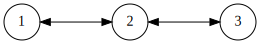

In [7]:
S = [1,2,3]
P = np.array([[0, 1, 0], [0.5, 0, 0.5], [0, 1, 0]])
mcviz.dot_mc(P, S, bidir=True)

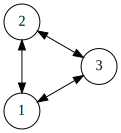

In [8]:
S = [1,2,3]
P = np.array([[0, 0.5, 0.5], [0.5, 0, 0.5], [0.5, 0.5, 0]])
mcviz.dot_mc(P, S, bidir=True)

### Exercise 5.6

Give an example of a periodic DTMC with period $d = 3$.  (Note that the simplest example will have $|\mathcal{S}| = 3$.)

### Exercise 5.7

Suppose an irreducible DTMC has at least one state $i$ with $p_{ii} > 0$.  Then this DTMC must be **aperiodic**.  Why?

**Note:** The converse is not true: even if $p_{ii} = 0$ for all $i \in \mathcal{S}$, the DTMC is not necessarily periodic.

---
## Recap

We've introduced a lot of new terminology and concepts in this Section.  If we've specified the dynamics of a Markov chain with $\mathbf{P}$ and the Chapman-Kolmogorov equations, what is the point of all of this?  Again, we are looking for **structure**.

Consider the following DTMC:

In [9]:
S = list(range(1,9))
P = np.array([[7/13,2/13,0,0,0,4/13,0,0],
               [0,0,0,0,1/3,1/3,1/3,0],
               [0,0,0,5/12,7/12,0,0,0],
               [0,0,0,0,0,0,1/2,1/2],
               [1/5,4/5,0,0,0,0,0,0],
               [0,0,0,0,7/11,0,4/11,0],
               [1,0,0,0,0,0,0,0],
               [0,0,0,0,5/9,0,4/9,0]])
display(Math(r'\mathcal{S} = \{' + ','.join(map(str,S)) + '\}'))
display(Math(r'\mathbf{P} = ' + dtmc.pmatrix(P, frac=True)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

While this fully specifies the Markov chain, it doesn't give us much insight into its behavior or dynamics (beyond what one-step transitions are possible).  Looking at the transition diagram is a little more helpful, but it can also appear to be a mess of nodes and edges unless we know what to look for.

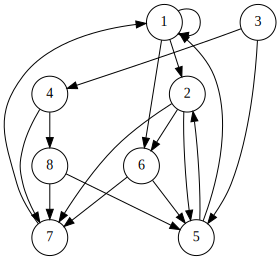

In [10]:
display(mcviz.dot_mc(P, S, engine='dot', bidir=False, self_edge=True))

What we are looking for is the structure of the Markov chain.  The definitions in this section give us a more organized way of thinking about the states and transitions:
* Communication classes are $\{1, 2, 5, 6, 7\}$, $\{3\}$, $\{4\}$, and $\{8\}$.
* States $1, 2, 5, 6, 7$ are recurrent, the rest are transient.

If we draw the transition diagram with communication classes in mind, it is easier to see what the dynamics of the Markov chain will be.  If it starts in any of the transient communication classes, it will end up in the recurrent communication class (after at most three steps) and then circulate among the recurrent states from then on.

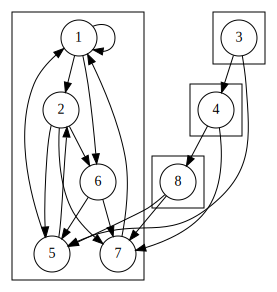

In [11]:
display(mcviz.more_cluster_mc(P, S, engine='dot', bidir=False, self_edge=True))

Similarly, we can easily see the effect of adding or removing some (one-step) transitions.  (Assuming we renormalize $\mathbf{P}$ so that the rows sum to 1, including adjusting $p_{ii}$ as needed.)
* Add a transition from state $1$ to state $3$ ($p_{13} > 0$): Markov chain becomes irreducible.
* Add a transition from state $1$ to state $3$ ($p_{83} > 0$): $\{3, 4, 8\}$ becomes a communication class (these states are still transient).
* Remove the transition from state $1$ to state $3$ ($p_{71} = 0$): $\{7\}$ becomes a communication class (absorbing) and $\{1, 2, 5, 6\}$ become transient.

The codeblock below implements these changes and re-draws the transition diagram with the new communication classes.  (Uncomment/comment the appropriate lines by removing/adding `#` at the beginning of each line or use the Edit Mode keyboard shortcut.)  Note that Python arrays are indexed from `0` so `P[0,2]` represents $p_{13}$.  If you find this confusing, you can change some code above to `S = list(range(0,8))` to relabel the state space to $\{0, 1, \dots, 7\}$.

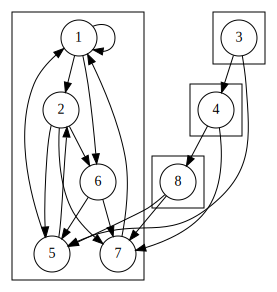

In [12]:
P_chg = np.copy(P) # Make a copy of the transition probability matrix to change

# P_chg[0,2] = 1/13 # Add transition from state 1 to state 3
# P_chg[0,0] = 6/13 # Renormalize

# P_chg[7,2] = 1/9 # Add transition from state 8 to state 3
# P_chg[7,6] = 1/3 # Renormalize

# P_chg[6,0] = 0 # Remove transition from state 7 to state 1
# P_chg[6,6] = 1 # Renormalize

display(mcviz.more_cluster_mc(P_chg, S, engine='dot', bidir=False, self_edge=True))

By now you've also noticed that to determine the communication classes, you need only to look at which one-step transitions are possible or not possible (that is, whether $p_{ij} > 0$ or $p_{ij} = 0$) -- a more exact value of the transition probabilities do not change the structure.  (This is also why we have not bothered labeling any of the arrows on the transition diagrams.)

Recognizing the structure of a Markov chain is a skill that you should develop.  As with most skills, it requires practice and there are a variety of techniques you can use (inspecting $\mathbf{P}$, drawing and examining the transition digram, numerical calculations).  Your skills will be stronger if you have a wider range of techniques you are comfortable with.  While I've provided some tools to help you (e.g., Python funcitons to draw the transition diagram, identify communication classes), be wary of becoming dependent on them.

---
## Practice Exercises

### Exercise 5.8

For each of the Markov chains below, identify the communication classes and determine whether each state is transient or recurrent.  Identify any absorbing states.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

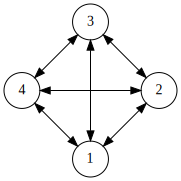

In [13]:
S = [1, 2, 3, 4]
P = np.array([[0.3, 0.2, 0.4, 0.1],
              [0.4, 0.1, 0.4, 0.1],
              [0.7, 0.2, 0, 0.1],
              [0.5, 0.3, 0.1, 0.1]
             ])
dtmc.disp_dtmc(P, S)
display(mcviz.dot_mc(P, S, bidir=True))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

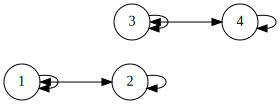

In [14]:
S = [1, 2, 3, 4]
P = np.array([[0.3, 0.7, 0, 0],
              [0.8, 0.2, 0, 0],
              [0, 0, 0.5, 0.5],
              [0, 0, 0.5, 0.5]
             ])
dtmc.disp_dtmc(P, S)
display(mcviz.dot_mc(P, S,bidir=True, self_edge=True))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

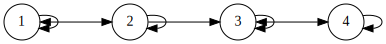

In [15]:
S = [1, 2, 3, 4]
P = np.array([[0.3, 0.7, 0, 0],
              [0.8, 0.1, 0.1, 0],
              [0, 0, 0.5, 0.5],
              [0, 0, 0.5, 0.5]
             ])
dtmc.disp_dtmc(P, S)
display(mcviz.dot_mc(P, S, bidir=True, self_edge=True))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

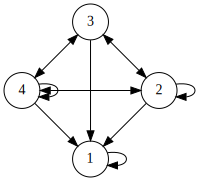

In [16]:
S = [1, 2, 3, 4]
P = np.array([[1, 0, 0, 0],
              [0.4, 0.1, 0.4, 0.1],
              [0.7, 0.2, 0, 0.1],
              [0.5, 0.3, 0.1, 0.1]
             ])
dtmc.disp_dtmc(P, S)
display(mcviz.dot_mc(P, S, bidir=True, self_edge=True))

### Exercise 5.9

For the Markov chain below, identify the communication classes and determine whether each state is transient or recurrent.  Identify any absorbing states.

**Note:** The example below is randomly generated.  You can re-reun the code blocks to get different examples.  You can also change the size of the state space `dim` and the keyword argument `p`.  Values of `p` closer to 1 will tend to decrease the number of communication classes while values of `p` closer to 0 will tend to increase the number of communication classes.  (`p` represents the probability that any one-step transition probability is non-zero.)

In [17]:
dim = 5 # size of state space
S = range(1,dim+1)
P = dtmc.rand_P(dim, p=1.5/dim)

In [20]:
dtmc.disp_dtmc(P, S, frac=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Note:** You can use the following functions to check the communication classes:
* `dtmc.comm_class(P)` will return a list of sets representing the communication classes.  The only input argument is the transition probability matrix `P`.  This assumes a state space of $\{0, 1, 2, \dots, |\mathcal{S}|-1\}$.
* `mcviz.more_cluster_mc(P, S, engine='dot')` will draw a transition diagram where the communication classes are clustered and contained in boxes.  You may include keyword arguments `bidir` and `self_edge` as before (with the `mcviz.dot_mc` function).

### Exercise 5.10

For each of the following, come up with an example of a DTMC that has the structure described.  (You do not necessarily have to specify $\mathbf{P}$ completely, but enough to draw a transition diagram.  However, you should be able to completely specify a valid $\mathbf{P}$ if asked.)

Let $\{X_n, n \geq 0\}$ be a discrete-time Markov chain on state space $\mathcal{S} = \{1, 2, 3, 4\}$.  For each of the following, come up with an example of a DTMC that has the structure described. **If it is impossible** to have such a DTMC, state as simply as possible why not.

**Note:** Each part lists the communication classes and the states in each communication class are described as either recurrent or transient.  For example:
<center> $\{1, 2\}$ are transient, $\{3, 4\}$ are recurrent. </center>
means that $\{1, 2\}$ is a communication class and both states are transient, and $\{3, 4\}$ is a communication class and both states are transient.

1. $\{1, 2\}$ are transient, $\{3, 4\}$ are recurrent.
1. $\{1, 2\}$ are recurrent, $\{3, 4\}$ are recurrent.
1. $\{1, 2\}$ are transient, $\{3, 4\}$ are transient.
1. $\{1, 2, 3, 4\}$ are recurrent.
1. $\{1\}$ is transient, $\{3\}$ is transient, $\{2, 4\}$ are recurrent.
1. $\{1\}$ is recurrent, $\{3\}$ is recurrent, $\{2, 4\}$ are transient.
1. $\{1\}$ is transient, $\{2, 3, 4\}$ are recurrent.
1. $\{1\}$ is recurrent, $\{2, 3, 4\}$ are transient.
1. The communication classes are $\{1\}$, $\{2, 3\}$, $\{4\}$ and either state 1 or 4 is absorbing, but not both.  In your example, which states are recurrent and which are transient?


### Exercise 5.11

Come up with an example of a DTMC on the state space $\mathcal{S}$ specified that has the structure described.

(This is randomly generated, so you can re-run the codeblock to generate another exercise.  Change the variable `dim` to change $|\mathcal{S}|$.)

In [19]:
dim = 4
display(Math(r'\mathcal{S} = \{'+','.join(map(str, range(1,dim+1)))+'\}'))
display(Markdown(dtmc.rand_struct_exercise(dim)))

<IPython.core.display.Math object>

$\{1\}$ is recurrent, $\{2\}$ is transient, $\{3\}$ is transient, $\{4\}$ is recurrent.